There is a very cool JupyterLab extension for WISYWIG annotations of plotly graphs. https://github.com/plotly/jupyterlab-chart-editor. It can installed by searching for plotly in the "extensions" sidebar.

In [1]:
import os.path as path
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from haikunator import Haikunator
import plotly.figure_factory as ff

In [2]:
DATAROOT = path.expanduser("~/mldata")

## Scenario 1
Draw a bar chart of a categories dataset with lots (>50) categories. Verify the following:
  1. The category labels are auto-formated.
  2. I an specify the size of the figure.
  3. I can specify the title of the chart.
  4. I can specify the labels to put on the x- and y- axes.

In [3]:
h = Haikunator()
deployments = [h.haikunate() for _ in range(50)]
uptimes = np.random.randint(0, 100, 50)
print(len(deployments), uptimes.shape)
print(deployments[:5], uptimes[:5])

50 (50,)
['broken-lake-9569', 'proud-pond-3321', 'throbbing-term-3010', 'old-wildflower-4241', 'withered-cake-3972'] [89 53 53 14 85]


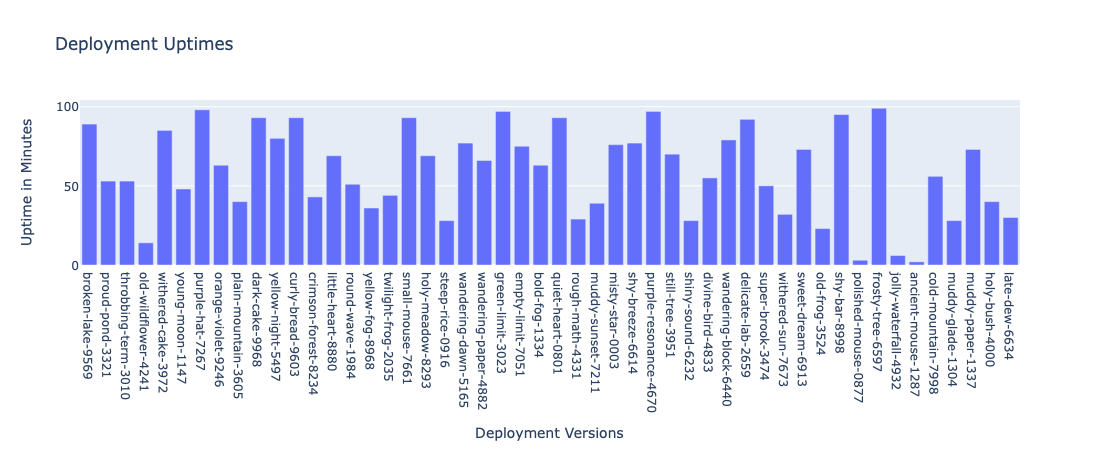

In [4]:
fig = go.Figure(
    data=go.Bar(x=deployments, y=uptimes),
    layout_title_text="Deployment Uptimes",
    layout_xaxis_title="Deployment Versions",
    layout_yaxis_title="Uptime in Minutes"
)
fig.show()

## Scenario 2
Draw 2 line plots on overlaid on the same chart using a categorical dataset. Verify the following:
  1. I am able to specify a title for the chart.
  2. The system automatically adds legends for the chart.
Plotly will auto-generate legends named "trace1", etc. which is not very meaningful. Use `name` argument instead to provide custom text.

In [5]:
iris_df = px.data.iris()
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [7]:
by_species = iris_df.groupby(["species"]).mean()
by_species

sepal_length  sepal_width  petal_length  petal_width  species_id
species                                                                     
setosa             5.006        3.418         1.464        0.244           1
versicolor         5.936        2.770         4.260        1.326           2
virginica          6.588        2.974         5.552        2.026           3

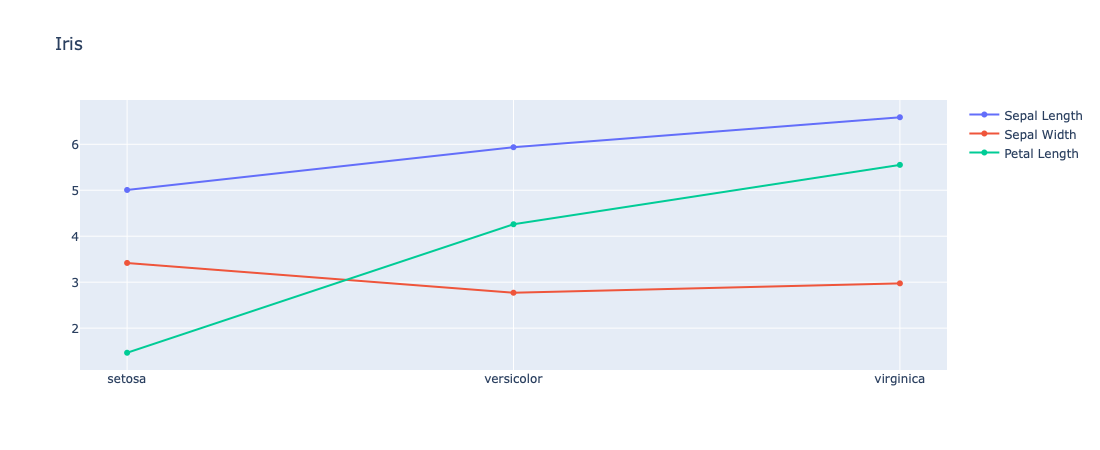

In [8]:
fig = go.Figure(layout_title_text="Iris")
# default mode for scatter plots is "lines"
fig.add_scatter(x=by_species.index.values, y=by_species["sepal_length"].values, name="Sepal Length")
fig.add_scatter(x=by_species.index.values, y=by_species["sepal_width"].values, name="Sepal Width")
fig.add_scatter(x=by_species.index.values, y=by_species["petal_length"].values, name="Petal Length")
fig.show()

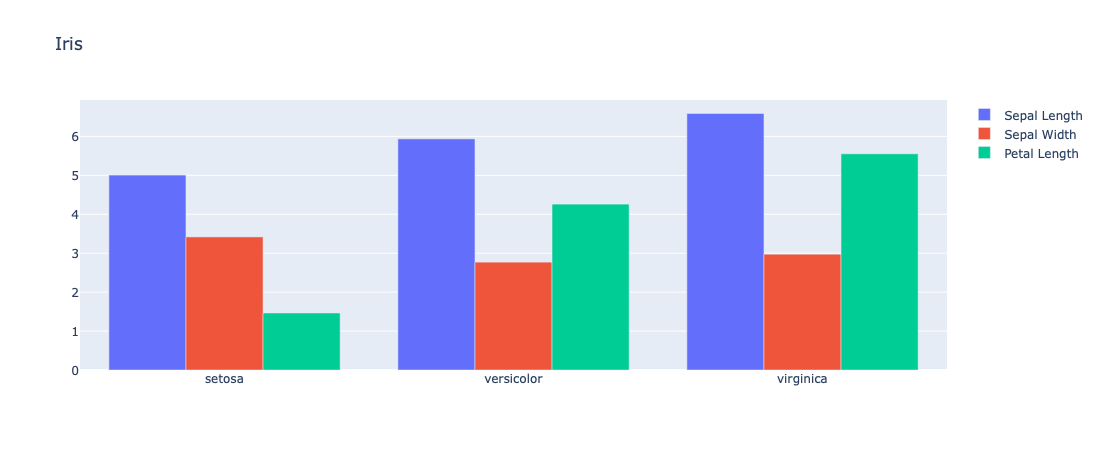

In [9]:
fig = go.Figure(layout_title_text="Iris")
# default mode for scatter plots is "lines"
fig.add_bar(x=by_species.index.values, y=by_species["sepal_length"].values, name="Sepal Length")
fig.add_bar(x=by_species.index.values, y=by_species["sepal_width"].values, name="Sepal Width")
fig.add_bar(x=by_species.index.values, y=by_species["petal_length"].values, name="Petal Length")
fig.show()

## Scenarion 3

On a dataset with numerical x-values, draw a bar chart and a line chart in the same figure. Verify the following:
  1. I can modify the invidual colors of the lines and bars.
  2. I can specify a color pallette for the different charts.
  3. I can specify different titles and axes labels for the different charts.
  
Haven't explored how to set different axes labels and titles for both the charts.

In [10]:
gap_df = px.data.gapminder()
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [11]:
gap_df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [12]:
us_df = gap_df[gap_df["country"] == "United States"][["year", "pop"]]
us_df

year        pop
1608  1952  157553000
1609  1957  171984000
1610  1962  186538000
1611  1967  198712000
1612  1972  209896000
1613  1977  220239000
1614  1982  232187835
1615  1987  242803533
1616  1992  256894189
1617  1997  272911760
1618  2002  287675526
1619  2007  301139947

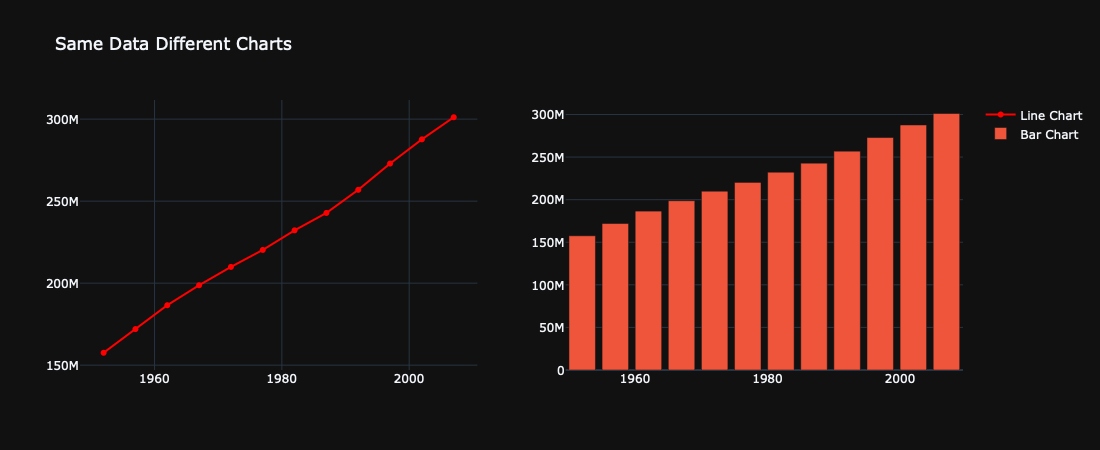

In [13]:
fig = make_subplots(rows=1, cols=2)
fig.add_scatter(x=us_df["year"].values, y=us_df["pop"].values, row=1, col=1, name="Line Chart", line_color="red")
fig.add_bar(x=us_df["year"].values, y=us_df["pop"].values, row=1, col=2, name="Bar Chart")
fig.update_layout(title_text="Same Data Different Charts", template="plotly_dark")
fig.show()

In [14]:
# Can choose from any of the available templates
plotly.io.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

## Scenario 4
Scatter plot with numerical data. Verify:
  1. I can set custom tick intervals

Did not explore custom tick intervals

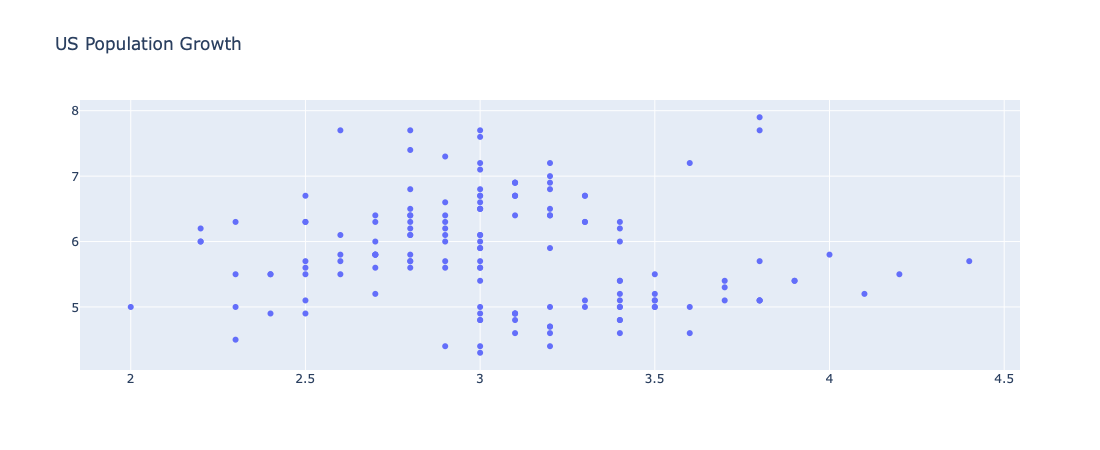

In [15]:
fig = go.Figure(
    layout_title_text="US Population Growth", 
    data=go.Scatter(
        x=iris_df["sepal_width"].values,
        y=iris_df["sepal_length"].values,
        mode="markers"
    )
)
fig.show()

## Scenario 5
Draw a scatter plot where the 2 numerical dims are on the x- and y- axes, a third numeric dim is represented as the size of the marker, and two other categorical dims are represented as the color and shape of the markers.

This scenario is best met with `plotly.express` which is explored in more detail in the later half of this notebook. I have not explored how to change the shape of the marker based on a categorical field.

In [16]:
tips_df = px.data.tips()
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [17]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

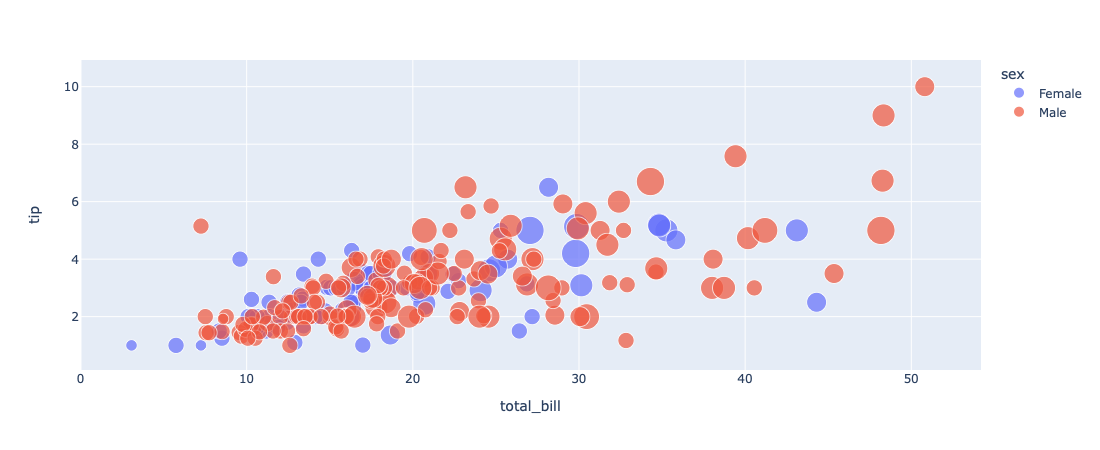

In [18]:
fig = px.scatter(tips_df, x="total_bill", y="tip", color
                 ="sex", size="size")
fig.show()

## Scenario 6
Scatter matrix plot of a dataset with 4 numerical fields. This scenario is also best demonstrated by `plotly_express`.

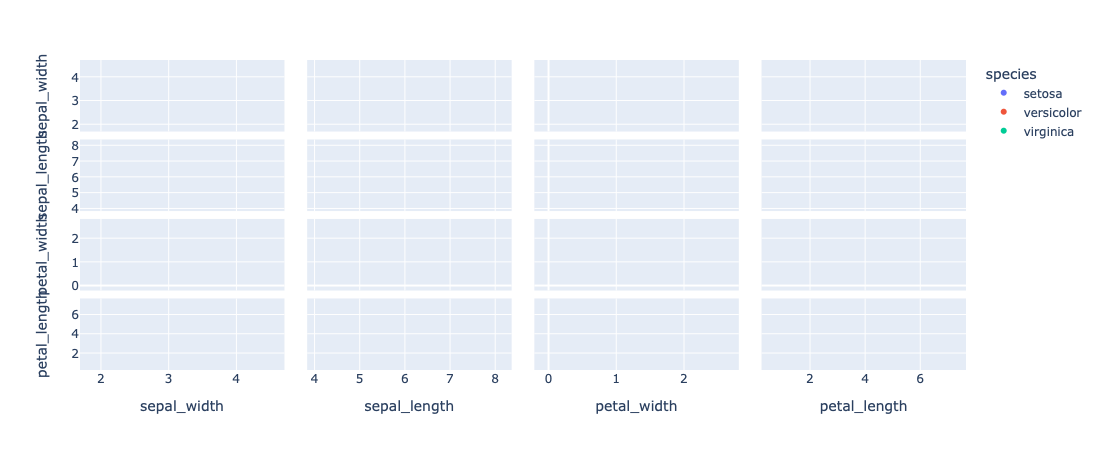

In [19]:
fig = px.scatter_matrix(
    iris_df, 
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species"
)
fig.show()

## Scenario 7
Timeseries data. This is done best with `pyplot.express`.

In [20]:
dji_df = pd.read_csv(path.join(DATAROOT, "dji.csv"), parse_dates=["Date"])

In [21]:
dji_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8898 entries, 0 to 8897
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8898 non-null   datetime64[ns]
 1   Open       8898 non-null   float64       
 2   High       8898 non-null   float64       
 3   Low        8898 non-null   float64       
 4   Close      8898 non-null   float64       
 5   Adj Close  8898 non-null   float64       
 6   Volume     8898 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 486.7 KB


In [22]:
dji_df.head()

Date         Open         High          Low        Close    Adj Close  \
0 1985-01-29  1277.719971  1295.489990  1266.890015  1292.619995  1292.619995   
1 1985-01-30  1297.369995  1305.099976  1278.930054  1287.880005  1287.880005   
2 1985-01-31  1283.239990  1293.400024  1272.640015  1286.770020  1286.770020   
3 1985-02-01  1276.939941  1286.109985  1269.770020  1277.719971  1277.719971   
4 1985-02-04  1272.079956  1294.939941  1268.989990  1290.079956  1290.079956   

     Volume  
0  13560000  
1  16820000  
2  14070000  
3  10980000  
4  11630000

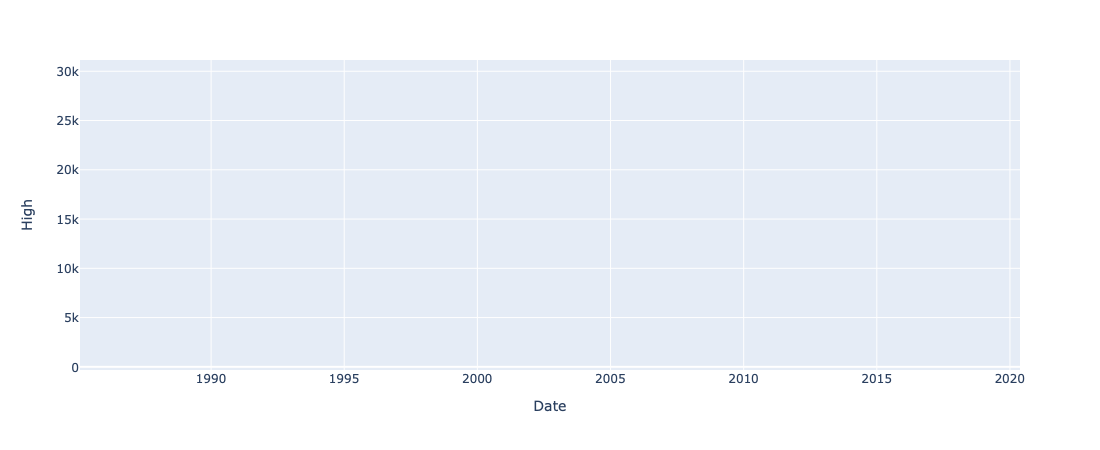

In [23]:
fig = px.line(dji_df, x="Date", y="High")
fig.show()

## Scenario 8
Draw Grapher like graphs. Verify:
  1. I am able to toggle grid lines on both the axes.

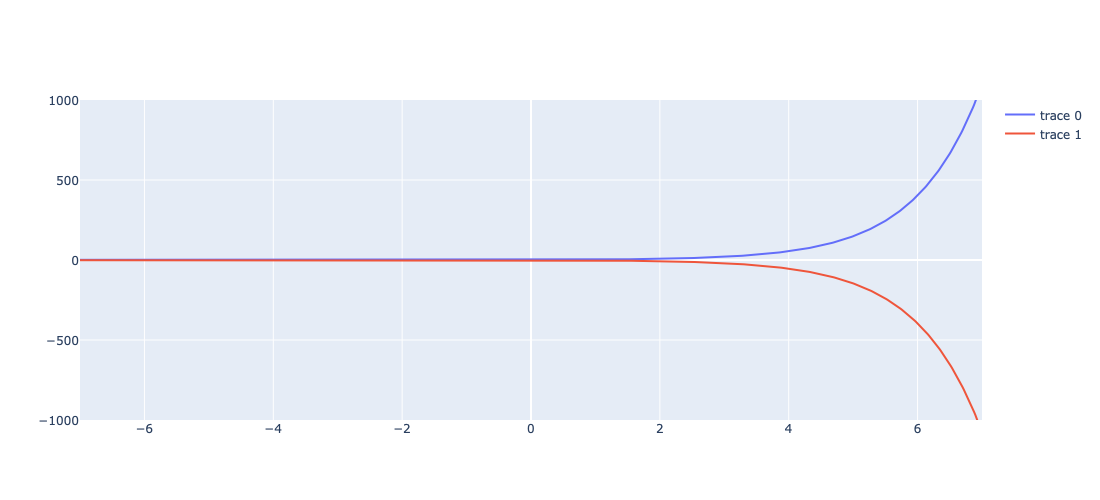

In [24]:
x = np.linspace(-10, 10, 1000)
y1 = np.exp(x)
y2 = -2.71**x
fig = go.Figure(layout_width=500, layout_height=500)
fig.add_scatter(x=x, y=y1, mode="lines")
fig.add_scatter(x=x, y=y2, mode="lines")
fig.update_xaxes(range=[-7, 7])
fig.update_yaxes(range=[-1000, 1000])
# fig.update_xaxes(
#     showline=True, linewidth=2, linecolor='black', 
#     showgrid=True, 
#     zeroline=False
# )
# fig.update_yaxes(
#     showline=True, linewidth=2, linecolor='black', 
#     showgrid=True, 
#     zeroline=False
# )

# These are the defaults
fig.update_xaxes(
    showline=False,
    showgrid=True,
    zeroline=True
)

fig.update_yaxes(
    showline=False,
    showgrid=True,
    zeroline=True
)

## Scenario 10
Historgrams and distribution plots. Works best with express.

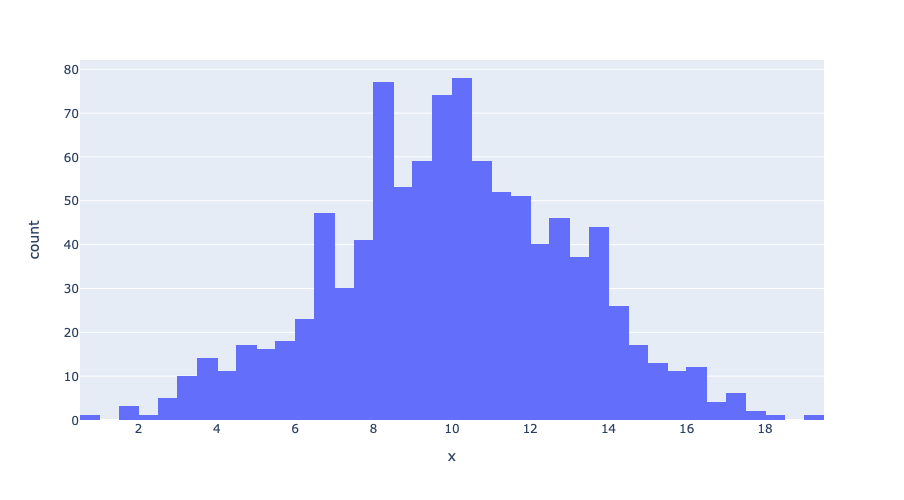

In [25]:
x = np.random.normal(loc=10, scale=3, size=1000)
fig = px.histogram(x=x)
fig.update_layout(width=500, height=500)
fig.show()

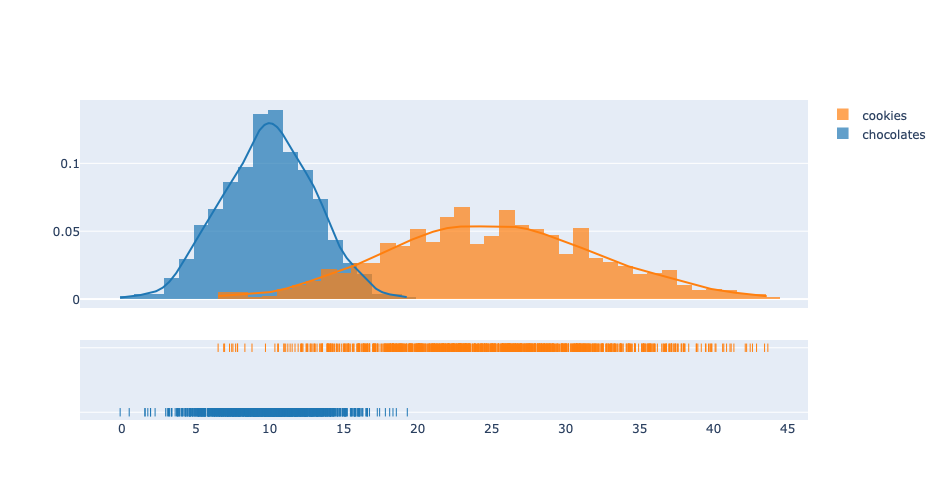

In [26]:
x1 = np.random.normal(loc=10, scale=3, size=1000)
x2 = np.random.normal(loc=25, scale=7, size=1000)
hist_data = [x1, x2]
group_labels = ["chocolates", "cookies"] # name of the dataset
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(width=500, height=500)
fig.show()

## Scenario 11

3D Graphs

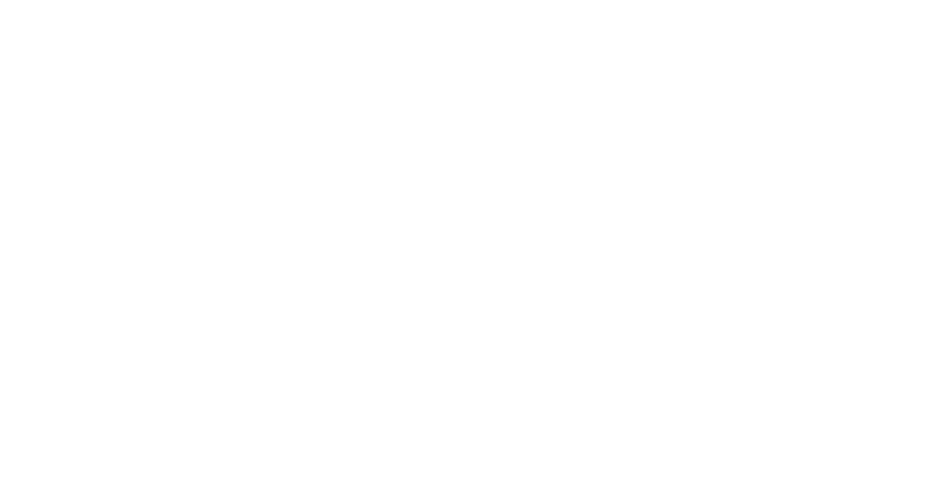

In [27]:
N = 70

fig = go.Figure(layout_width=500, layout_height=500)

x1 = 70*np.random.randn(N)
y1 = np.full_like(x1, 1)
# y1 = 55*np.random.randn(N)
z1 = 40*np.random.randn(N)
fig.add_trace(go.Mesh3d(x=x1, y=y1, z=z1, opacity=0.7, color='rgba(22,244,100,0.6)'))

x2 = 70*np.random.randn(N)
y2 = np.full_like(x2, 2)
z2 = 40*np.random.randn(N)
fig.add_trace(go.Mesh3d(x=x2, y=y2, z=z2, opacity=0.7, color='rgba(244,22,100,0.6)'))

fig.update_layout(
    scene=dict(
        yaxis=dict(range=[0, 4])
    )
)

# fig = go.Figure(data=[go.Mesh3d(x=x,
#                    y=y,
#                    z=z,
#                    opacity=0.5,
#                    color='rgba(244,22,100,0.6)'
#                   )])

# fig.update_layout(
#     scene = dict(
#         xaxis = dict(nticks=4, range=[-100,100],),
#                      yaxis = dict(nticks=4, range=[-50,100],),
#                      zaxis = dict(nticks=4, range=[-100,100],),),
#     width=700,
#     margin=dict(r=20, l=10, b=10, t=10))

fig.show()

## Surface plots

If only z-values are given, then integer indices are used for the `x` and `y` axis as seen in the graph below.

In [29]:
z_data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv")

In [34]:
z_data

Unnamed: 0          0           1           2          3          4  \
0            0  27.809850   49.619360   83.080670  116.66320  130.41400   
1            1  27.719660   48.550220   65.213740   95.27666  116.99640   
2            2  30.426700   33.477520   44.809530   62.47495   77.43523   
3            3  16.665490   30.108600   39.969520   44.12225   59.57512   
4            4   8.815617   18.351600    8.658275   27.58590   48.62691   
5            5   6.628881   10.413390   24.819390   26.08952   30.16050   
6            6  21.839750    6.639270   18.970850   32.89204   43.15014   
7            7  53.343030   26.797970    6.639270   10.88787   17.20440   
8            8  25.667850   63.057170   22.141400   17.07400   41.74483   
9            9  12.827000   69.205540   46.762930   13.96517   33.88744   
10          10   0.000000   68.663960   59.043500   33.35762   47.45282   
11          11   0.000000   95.174990   80.038180   59.89862   39.58476   
12          12   0.000000  134.987900  130.369600   96.86325   75.70494   
13          13   0.000000   48.089190  142.555800  140.37770  154.72610   
14          14   0.000000   54.194100  146.383900   99.48143   96.19411   
15          15   0.000000    6.919659  195.170900  132.52530  135.23410   
16          16   0.000000   21.738710  123.133900  176.74140  158.26980   
17          17   0.000000    0.000000   62.046720  136.31220  201.79520   
18          18   0.000000    0.000000   79.629930  139.69780  173.16700   
19          19   0.000000    0.000000   33.266400   57.53643  167.22410   
20          20   0.000000    0.000000   29.779370   54.97282  144.79950   
21          21   0.000000    0.000000   31.409000  132.74180  185.57960   
22          22   0.000000    0.000000   19.589940   42.30355   96.26777   
23          23   0.001230    3.008948    5.909858   33.50574  104.33410   
24          24   0.000000    5.626141    7.676256   63.16226   45.99762   

            5          6          7          8  ...          14         15  \
0   150.72060  220.18710  156.15360  148.64160  ...   49.961420   21.89279   
1   133.90560  152.34120  151.93400  160.11390  ...   33.088710   38.40972   
2   104.21530  102.73930  137.00040  186.07060  ...   48.471320   74.71461   
3    77.56929  106.89250  166.55390  175.23810  ...   60.559160   55.92124   
4    60.18013   91.32860  145.71090  116.06530  ...   47.426910   69.20731   
5    52.30802   64.71007   76.30823   84.63686  ...  140.264700   81.26501   
6    62.86014  104.66570  130.22940  114.84940  ...  122.422100  123.96980   
7    56.18116   79.70141   90.84530   98.27675  ...   68.174900   46.24076   
8    60.27227   81.42432  114.44400  102.32340  ...   59.193550   42.47175   
9    61.82613   84.74799  121.12200  145.27410  ...   79.344250   25.93483   
10   57.83550   78.91689  107.82750  168.00530  ...  189.761700  137.33780   
11   50.28058   63.81641   80.61302   66.37824  ...   60.218570   77.41475   
12   58.86466   57.20374   55.18837   78.12800  ...  130.263200   54.93822   
13   87.93610   58.11092   52.83869   67.14822  ...  238.664000  190.20000   
14  102.94730   76.14089   57.78440   47.04020  ...  328.482000  285.44890   
15   89.85069   89.45549   60.29967   50.33806  ...  123.967300  103.70270   
16  137.23500  105.30890   86.63255   53.11591  ...  111.421500  101.19560   
17  168.13430   95.20460   58.90624   46.94091  ...   44.030770   55.64542   
18  192.87180  196.34990  144.66110  106.54240  ...   12.071770   22.38254   
19  196.48330  194.79660  182.18840  119.69610  ...    6.811293    6.63927   
20  207.49040  165.34320  171.40470  174.92160  ...    8.468093    6.63927   
21  121.82990  185.38410  160.65660  116.14780  ...   18.129320   10.28531   
22  187.12070  179.66260  221.38980  154.26170  ...   26.101660   14.48469   
23  152.21650  198.19880  191.84100  228.73490  ...   27.918910   15.41052   
24   79.56688  227.31100  203.92870  172.56180  ...   34.318870   24.52780   

            16          

In [32]:
z_data.values.shape

(25, 25)

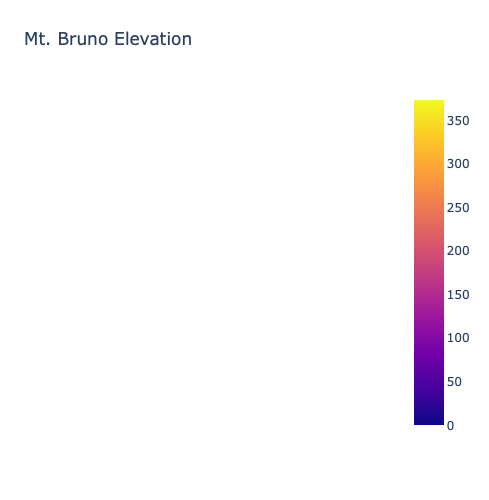

In [33]:
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_layout(
    title="Mt. Bruno Elevation", 
    autosize=False, 
    width=500, height=500,
    margin=dict(l=65, r=50, b=65, t=90)
)

Of course it is also possible to provide `x` and `y` values along with `z`.

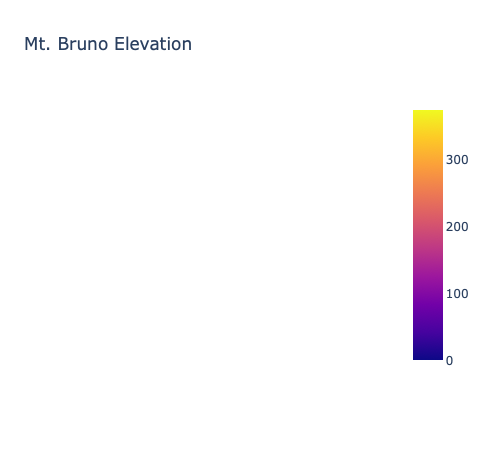

In [35]:
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title="Mt. Bruno Elevation")
fig.show()